In [6]:
# Import necessary libraries
import os
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFilter
import glob
import os
import cv2
from PIL import Image, ImageOps
import math
import pandas as pd
from sklearn. model_selection import train_test_split

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

import glob
import random

In [7]:

from scipy import ndimage
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from PIL import Image, ImageOps

In [8]:
os.chdir("C:\Data Science Projects\Digit Recognition\sudoku dataset")

In [3]:
from torch.utils.data import Dataset

import torch

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

import glob
import random


class PrintedMNIST(Dataset):
    """Generates images containing a single digit from font"""

    def __init__(self, N, random_state, transform=None):
        """"""
        self.N = N
        self.random_state = random_state
        self.transform = transform

        fonts_folder = "fonts"

        # self.fonts = ["Helvetica-Bold-Font.ttf", 'arial-bold.ttf']
        self.fonts = glob.glob(fonts_folder + "/*.ttf")

        random.seed(random_state)

    def __len__(self):
        return self.N

    def __getitem__(self, idx):

        target = random.randint(0, 9)

        size = random.randint(150, 250)
        x = random.randint(30, 90)
        y = random.randint(30, 90)

        color = random.randint(200, 255)

        # Generate image
        img = Image.new("L", (256, 256))

        target = random.randint(0, 9)

        size = random.randint(150, 250)
        x = random.randint(30, 90)
        y = random.randint(30, 90)

        draw = ImageDraw.Draw(img)
        font = ImageFont.truetype(random.choice(self.fonts), size)
        draw.text((x, y), str(target), color, font=font)

        img = img.resize((28, 28), Image.BILINEAR)

        if self.transform:
            img = self.transform(img)

        return img, target

In [7]:
fonts_folder = "C:\Windows\Fonts"
fonts = glob.glob(fonts_folder + "/*.ttf")

In [10]:
import os
os.chdir(fonts_folder)

In [11]:
from fontTools.ttLib import TTFont

FileNotFoundError: [Errno 2] No such file or directory: '.ttf'

In [ ]:
def get_font_image():
    fonts_folder = "C:\Windows\Fonts"
    fonts = glob.glob(fonts_folder + "/*.ttf")

    color = random.randint(200, 255)

    # Generate image
    img = Image.new("L", (256, 256))

    target = random.randint(0, 9)

    size = random.randint(130, 180)
    x = random.randint(30, 90)
    y = random.randint(30, 90)

    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype(random.choice(fonts), size)
    draw.text((x, y), str(target), color, font=font, align='center')

    img = img.resize((28, 28), Image.BILINEAR)
    img = ImageOps.invert(img)
    #print(size, x, y, color)
    return(img, target)
    



In [ ]:
image, target = get_font_image()
display(image)
image = image_convert(image)
#display(Image.fromarray(np.uint8(image)))

In [ ]:
os.chdir("C:\Data Science Projects\Digit Recognition\sudoku dataset\Custom Digits Dataset")
root_folder = 'C:\Data Science Projects\Digit Recognition\sudoku dataset\Custom Digits Dataset'
for i in range(10000, 20000):
    if i%1000 == 0:
        print(i)
    image, target = get_font_image()
    #display(image)
    pic_folder = root_folder + "\\" + str(target)
    os.chdir(pic_folder)
    image_name = "img" + str(i) + ".png"
    #print(pic_folder)
    try:
        image = image_convert(image)
        cv2.imwrite(image_name, image)
    except:
        pass

In [9]:
def get_acc(actual_sol_file, sudoku_sol):
    actual_sol = pd.read_csv(actual_sol_file).to_numpy()
    actual_sol = actual_sol[:,1:]
    counter=0
    for i in range(9):
        for j in range(9):
            if sudoku_sol[i,j] == actual_sol[i,j]:
                counter+=1
    print("accuracy: ", counter/81)
    

def getBestShift(img):
    cy,cx = ndimage.measurements.center_of_mass(img)

    rows,cols = img.shape
    shiftx = np.round(cols/2.0-cx).astype(int)
    shifty = np.round(rows/2.0-cy).astype(int)

    return shiftx,shifty

def shift(img,sx,sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]])
    shifted = cv2.warpAffine(img,M,(cols,rows))
    return shifted

def show(image_np):
    display(Image.fromarray(np.uint8(image_np)))
    


In [10]:
def impute_zero():

    
    color = 255
    font_type = 'C:\\Windows\\Fonts\\calibri.ttf'
    img = Image.new("L", (256,256))

    target = 0

    size = 225
    x = 50
    y = 25

    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype(font_type, size)
    draw.text((x, y), str(target), color, font=font)

    img = img.resize((28, 28), Image.BILINEAR)
    img = ImageOps.invert(img)
    return(img)

In [11]:
color = 255
font_type = 'C:\\Windows\\Fonts\\calibri.ttf'
img = Image.new("L", (256,256))

target = 0

size = 225
x = 50
y = 25

draw = ImageDraw.Draw(img)
font = ImageFont.truetype(font_type, size)
draw.text((x, y), str(target), color, font=font)

img = img.resize((28, 28), Image.BILINEAR)
img = ImageOps.invert(img)


img = impute_zero()
image_np = np.array(img)
ret,thresh_inv = cv2.threshold(image_np, 180, 255,cv2.THRESH_BINARY_INV)
contours,hierarchy = cv2.findContours(thresh_inv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

pos = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    if (w < 23 and x > 2 and x<24) and (h < 25 and y > 2 and y<24):#multiplied each number by 9 due to the resized image
    #pos = (x,y,x+w,y+h)
        pos.append((x,y,x+w,y+h))
        zero_img1 = thresh_inv[(pos[0][1]):(pos[0][3]),(pos[0][0]):(pos[0][2])]
        


C:\Users\shash\AppData\Local\Temp\ipykernel_14352\1871658312.py:15: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  img = img.resize((28, 28), Image.BILINEAR)
C:\Users\shash\AppData\Local\Temp\ipykernel_14352\2627194412.py:18: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  img = img.resize((28, 28), Image.BILINEAR)


In [12]:
def image_convert(image, shift_1_0=1):
    
    image_np = np.asarray(image)
    ret,thresh_inv = cv2.threshold(image_np, 180, 255,cv2.THRESH_BINARY_INV)
    #isplay(Image.fromarray(np.uint8(thresh_inv)))
    contours,hierarchy = cv2.findContours(thresh_inv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    img1 = np.zeros((1,1))
    pos = []
    
    if len(contours) == 0:
        img1 = zero_img1.copy()
    
    for c in contours:
        x,y,w,h = cv2.boundingRect(c)
        if (w < 23 and x > 2 and x<24) and (h < 25 and y > 2 and y<24):#multiplied each number by 9 due to the resized image
        #pos = (x,y,x+w,y+h)
            pos.append((x,y,x+w,y+h))
            img1 = thresh_inv[(pos[0][1]):(pos[0][3]),(pos[0][0]):(pos[0][2])]
            break
        else:
            img1 = zero_img1.copy()
            

    rows,cols = img1.shape
    #print(rows, cols)

    if rows > cols:
        factor = 20.0/rows
        rows = 20
        cols = int(round(cols*factor))
        img1 = cv2.resize(img1, (cols,rows))
    else:
        factor = 20.0/cols
        cols = 20
        rows = int(round(rows*factor))
        img1 = cv2.resize(img1, (cols, rows))
    #print(gray.shape)

    colsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
    rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
    img1 = np.lib.pad(img1,(rowsPadding,colsPadding),'constant')
    
    
    if shift_1_0 == 1:
        shiftx,shifty = getBestShift(img1)
        shifted = shift(img1,shiftx,shifty)
        img1 = shifted
    #display(Image.fromarray(np.uint8(img1)))
    return(img1)
    

In [13]:
def get_sudoku_digits(sudoku, show_image=1):
    sudoku = Image.open(sudoku)
    sudoku_sol = np.zeros((9,9))
    pad = 0
    for col in range(9):
        for row in range(9):
            left = col*sudoku.size[0]/9
            top =  row*sudoku.size[0]/9

            right = (col+1)*sudoku.size[0]/9
            bottom = (row+1)*sudoku.size[0]/9

            #image = sudoku.crop((left+pad, top+pad, right-pad, bottom-pad))
            #print(left, top, right, bottom)
            image = sudoku.crop((left, top, right, bottom))
            image = image.resize((28,28))
            image = ImageOps.grayscale(image)
            if show_image==1:
                display(image)
            image = image_convert(image, shift_1_0=1)
            #image = image_convert2(image)
            image = np.reshape(image, (1,28,28,1))
            if show_image==1:
                print(np.argmax(model.predict(image)))
            sudoku_sol[row][col] = np.argmax(model.predict(image))
    return(sudoku_sol)

In [14]:
def solve_sudoku(sudoku_sol):
    arr = sudoku_sol.astype(int).copy()
    num_set = set([1,2,3,4,5,6,7,8,9])
    while len(np.where(arr==0)[0]) > 0:
        num = random.randint(0,(len(np.where(arr==0)[0])-1))
        row = np.where(arr==0)[0][num]
        col = np.where(arr==0)[1][num]

        c1 = 3*(int(col/3))
        c2 = c1 + 3

        r1 = 3*(int(row/3))
        r2 = r1 + 3

        set1 = set(arr[row,:])
        set2 = set(arr[:,col])
        set3 = set(arr[r1:r2, c1:c2].flatten())

        set4 = set1.union(set2,set3)
        set4 = set4.difference({0})
        val = num_set.difference(set4)


        if len(val) == 1:
            arr[row, col] = list(val)[0]
    return(arr)
    

In [15]:
root_dir = 'C:\Data Science Projects\Digit Recognition\sudoku dataset\Custom Digits Dataset'
Numbers = []
Images = []
for i in range(0,10):
    #print(i)
    sub_dir = root_dir + "\\" + str(i)
    for filename in glob.iglob(sub_dir + '**/*.png', recursive=True):
        #print(filename)
        image = Image.open(filename)
        #display(image)
        #image = image.convert('L')
        #image = image.resize((28,28))
        image = np.asarray(image)
        #image = image.astype('float32')
        #image /= 255  
        #image = image.reshape(784,)
        Images.append([image])
        Numbers.append([i])
print(len(Numbers), len(Images))

19959 19959


In [11]:
Images = np.array(Images)
Numbers = np.array(Numbers)
X_train, X_test, y_train, y_test = train_test_split(Images, Numbers, test_size=0.20, random_state=42)

In [12]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15967, 28, 28, 1) (15967, 10)
(3992, 28, 28, 1) (3992, 10)


In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])
batch_size = 128
epochs = 10

In [14]:

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
125/125 - 16s - loss: 0.7737 - accuracy: 0.7715 - val_loss: 0.4218 - val_accuracy: 0.8655
Epoch 2/10
125/125 - 15s - loss: 0.4488 - accuracy: 0.8598 - val_loss: 0.3644 - val_accuracy: 0.8855
Epoch 3/10
125/125 - 15s - loss: 0.3742 - accuracy: 0.8794 - val_loss: 0.3175 - val_accuracy: 0.8970
Epoch 4/10
125/125 - 15s - loss: 0.3382 - accuracy: 0.8873 - val_loss: 0.3059 - val_accuracy: 0.8988
Epoch 5/10
125/125 - 15s - loss: 0.3069 - accuracy: 0.8965 - val_loss: 0.3065 - val_accuracy: 0.8955
Epoch 6/10
125/125 - 15s - loss: 0.2904 - accuracy: 0.8986 - val_loss: 0.2923 - val_accuracy: 0.9003
Epoch 7/10
125/125 - 15s - loss: 0.2810 - accuracy: 0.9041 - val_loss: 0.2755 - val_accuracy: 0.9056
Epoch 8/10
125/125 - 15s - loss: 0.2630 - accuracy: 0.9096 - val_loss: 0.2793 - val_accuracy: 0.9078
Epoch 9/10
125/125 - 15s - loss: 0.2538 - accuracy: 0.9100 - val_loss: 0.2798 - val_accuracy: 0.9048
Epoch 10/10
125/125 - 15s - loss: 0.2438 - accuracy: 0.9147 - val_loss: 0.2766 - val_accura

In [ ]:
# Save Model
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("sudoku_model.h5")
print("Saved model to disk")

In [ ]:
sudoku = Image.open('sudoku10.png')
sudoku


In [9]:
pad = 0
pad2 = 2


row = 7
col = 1

left = col*sudoku.size[0]/9
top =  row*sudoku.size[0]/9

right = (col+1)*sudoku.size[0]/9
bottom = (row+1)*sudoku.size[0]/9

#image = sudoku.crop((left+pad, top+pad, right-pad, bottom-pad))
image = sudoku.crop((left, top, right, bottom))
image = image.resize((28,28))
image = ImageOps.grayscale(image)

display(image)


NameError: name 'sudoku' is not defined

In [ ]:

image2 = np.reshape(image2, (1,28,28,1))
np.argmax(model.predict(image2))

In [ ]:
sudoku_file = "sudoku10"
sudoku_sol = get_sudoku_digits(sudoku_file + ".png", show_image=0)
#get_acc(sudoku_file  + "_sol.csv", sudoku_sol)

In [15]:
sudoku_file = "sudoku11"
sudoku_sol = get_sudoku_digits(sudoku_file + ".png", show_image=0)
sudoku_sol

array([[0., 0., 0., 0., 5., 0., 0., 0., 4.],
       [0., 0., 0., 4., 2., 0., 9., 0., 0.],
       [0., 5., 0., 0., 0., 7., 0., 0., 8.],
       [0., 0., 5., 1., 0., 0., 8., 0., 7.],
       [1., 0., 2., 8., 7., 5., 4., 0., 6.],
       [7., 0., 8., 0., 0., 9., 5., 0., 0.],
       [9., 0., 0., 7., 0., 0., 0., 4., 0.],
       [0., 0., 7., 0., 3., 4., 0., 0., 0.],
       [4., 0., 0., 0., 8., 0., 0., 0., 0.]])

In [16]:
pd.DataFrame(sudoku_sol).to_csv("sudoku11.csv")

In [ ]:
# DEBUG
image_np = np.asarray(image)
ret,thresh_inv = cv2.threshold(image_np, 180, 255,cv2.THRESH_BINARY_INV)
#isplay(Image.fromarray(np.uint8(thresh_inv)))
contours,hierarchy = cv2.findContours(thresh_inv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
show(thresh_inv)



In [ ]:
# DEBUG
img1 = np.zeros((1,1))
pos = []
if len(contours) == 0:
    img1 = zero_img1.copy()
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    if (w < 23 and x > 2 and x<24) and (h < 25 and y > 2 and y<24):#multiplied each number by 9 due to the resized image
    #pos = (x,y,x+w,y+h)
        pos.append((x,y,x+w,y+h))
        img1 = thresh_inv[(pos[0][1]):(pos[0][3]),(pos[0][0]):(pos[0][2])]
        break
    else:
        img1 = zero_img1.copy()

In [ ]:
# DEBUG
rows,cols = img1.shape
#print(rows, cols)

if rows > cols:
    factor = 20.0/rows
    rows = 20
    cols = int(round(cols*factor))
    img1 = cv2.resize(img1, (cols,rows))
else:
    factor = 20.0/cols
    cols = 20
    rows = int(round(rows*factor))
    img1 = cv2.resize(img1, (cols, rows))
#print(gray.shape)

colsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
img1 = np.lib.pad(img1,(rowsPadding,colsPadding),'constant')


if shift_1_0 == 1:
    shiftx,shifty = getBestShift(img1)
    shifted = shift(img1,shiftx,shifty)
    img1 = shifted

In [ ]:

def sudoku_impute(sudoku, sudoku_sol):
    sudoku_out = sudoku.copy()


    color = 150
    font_type = 'C:\\Windows\\Fonts\\calibri.ttf'
    size = int((sudoku_out.size[0]/9) - (sudoku_out.size[0]/9)/5)

    font = ImageFont.truetype(font_type, size)
    draw = ImageDraw.Draw(sudoku_out)

    for row in range(9):
        for col in range(9):
            #print(sudoku_sol[row,col])
            x = (sudoku_out.size[0]/9)*col + (sudoku_out.size[0]/9)/4
            y = (sudoku_out.size[0]/9)*row + (sudoku_out.size[0]/9)/4

            if sudoku_sol[row,col] == 0:
                #print("Y")
                target = arr[row,col]
                draw.text((x, y), str(target), color, font=font)
    return(sudoku_out)

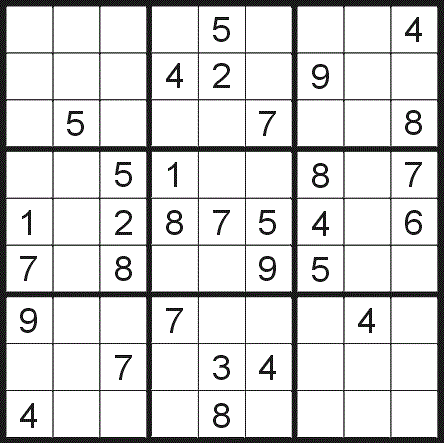

In [202]:
sudoku_file = "sudoku11.png"
sudoku = Image.open(sudoku_file)
sudoku


In [210]:
sudoku_sol = get_sudoku_digits(sudoku_file, show_image=0)

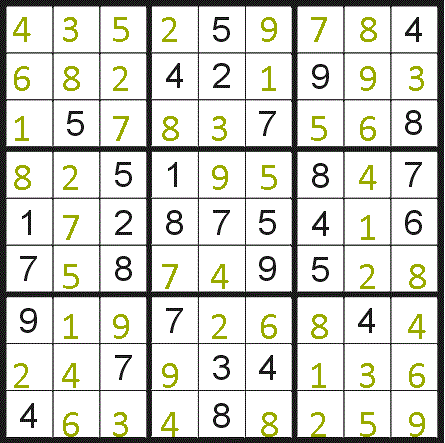

In [203]:

sudoku_solved = sudoku_impute(sudoku, sudoku_sol)
sudoku_solved